# Background blurring using single image

In [334]:
# System imports
from os import path
import math

# Third-Party Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np

# modify to where you store your project data including utils
datadir = "./" 

# utilfn = datadir + "utils"
# !cp -r "$utilfn" .
# samplesfn = datadir + "samples"
# !cp -r "$samplesfn" .

# can change this to your output directory of choice
!mkdir "images"
!mkdir "images/inputs"
!mkdir "images/outputs"

mkdir: images: File exists
mkdir: images/inputs: File exists
mkdir: images/outputs: File exists


## Part 2: Background Blur using Depth Image

In [335]:
'''
  The given position will be clear
  The other regions will be blurred based on the depth map

  dimg: depth image
  cimg: color image
  pos: position of the object to be clear
  blur_lv: blur level

  return: blurred image
  '''
def blur_background(dimg, cimg, pos, blur_lv=5, step=1):
  assert dimg.shape == cimg.shape[:2]

  # set up constants
  h,w = dimg.shape
  furthest = np.max(dimg)
  closest = np.min(dimg)
  focus_depth = dimg[pos[0], pos[1]]

  # divide the depth range into blur_lv levels. d is the depth range of each level
  dr = max(abs(furthest - focus_depth), abs(focus_depth - closest)) / (blur_lv)

  # given a depth, calculate its blur level
  def calc_level(x):
    nonlocal focus_depth
    if x == focus_depth:
      return 0

    return int(abs(int(x) - int(focus_depth)) / dr)
  
  # create multiple blurred images based on blur level
  blurred_imgs = [cimg.copy()]
  for i in range(blur_lv):
    kernel_size = 2 * step * i + 3
    blurred_imgs.append(cv2.GaussianBlur(cimg, (kernel_size, kernel_size), 0))

  # combine the blurred images based on the blur level at each pixel
  # get the pixel from the corresponding blurred image
  output = np.zeros((h,w,3),dtype=np.uint8)
  for i in range(h):
    for j in range(w):
      calculated_level = calc_level(dimg[i,j])
      output[i,j] = blurred_imgs[calculated_level][i,j]
  return (output, blurred_imgs)

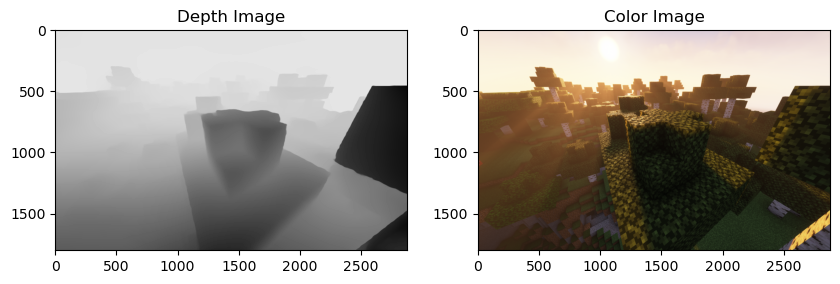

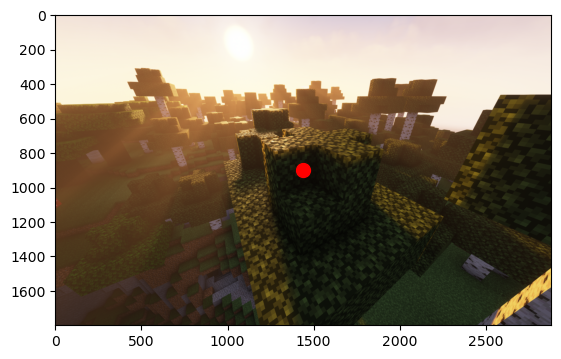

In [336]:
# read depth image
dimg = cv2.imread("images/inputs/d3.jpeg", cv2.IMREAD_ANYDEPTH)
# read color image
cimg = cv2.imread("images/inputs/c3.png")
cimg = cv2.cvtColor(cimg, cv2.COLOR_BGR2RGB)

# invert depth image TODO: change the rest of the code to avoid this inversion
dimg = np.max(dimg) - dimg

# parameters
position = (int(cimg.shape[0]/2), int(cimg.shape[1]/2))
blur_lv = 20
step = 1

# show depth image
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(dimg, cmap='gray')
plt.title("Depth Image")
plt.subplot(1,2,2)
plt.imshow(cimg)
plt.title("Color Image")
plt.show()

# show the focus position
plt.figure()
plt.imshow(cimg)
plt.scatter(position[1], position[0], c='r', s=100)
plt.show()

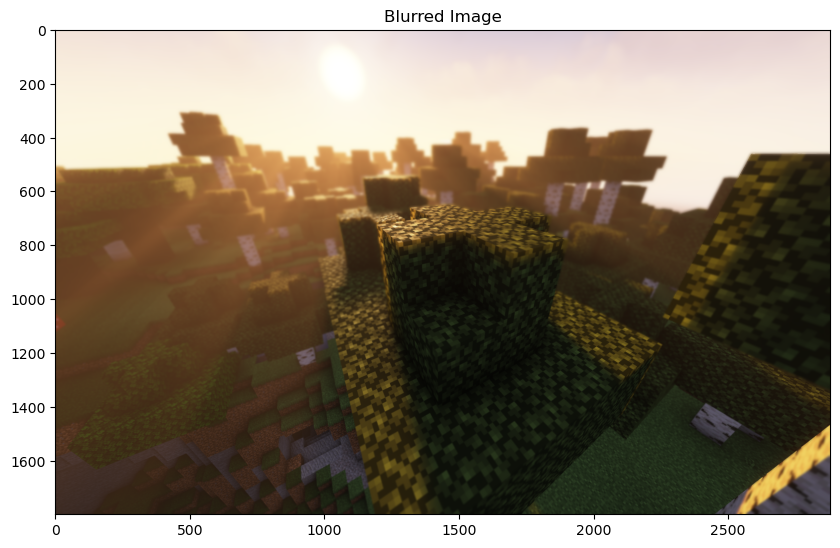

True

In [337]:
(result, blurred_images) = blur_background(dimg, cimg, position, blur_lv=blur_lv, step=step)
# show blurred image
plt.figure(figsize=(10,10))
plt.imshow(result)
plt.title("Blurred Image")
plt.show()

# from RGB to BGR
result = result[:,:,::-1]
# write blurred image
cv2.imwrite("images/outputs/blur.png", result)